In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('data/merged_df_for_causality.csv', parse_dates=['Date'])
display(df.columns)
df.head()

Index(['Date', 'country', 'district_code', 'district', 'centx', 'centy',
       'year_month', 'year', 'month', 'ipc', 'ha', 'ndvi_mean', 'ndvi_anom',
       'rain_mean', 'rain_anom', 'et_mean', 'et_anom', 'count_violence',
       'sum_fatalities', 'food_price_idx', 'area', 'cropland_pct', 'pop',
       'ruggedness_mean', 'pasture_pct', 'conflict_1#', 'conflict_2#',
       'total_conflict#'],
      dtype='object')

,Date,country,district_code,district,centx,centy,year_month,year,month,ipc,...,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct,conflict_1#,conflict_2#,total_conflict#
0,2007-01-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_01,2007,1,NaN,...,0,0.586252,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
1,2007-02-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_02,2007,2,NaN,...,0,0.577403,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
2,2007-03-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_03,2007,3,NaN,...,0,0.570951,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
3,2007-04-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_04,2007,4,NaN,...,0,0.593205,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
4,2007-05-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_05,2007,5,NaN,...,0,0.609532,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0


## Cannot have null values when training OLS (drop null rows)

In [24]:
df.dropna(subset=['ipc'], inplace=True)

In [25]:
X= df[['total_conflict#','ndvi_anom', 'cropland_pct', 'pop', 'rain_anom', 'conflict_1#', 'conflict_2#']]
y= df['ipc']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.save("regression_model")

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ipc   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     10.05
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           6.49e-06
Time:                        19:39:38   Log-Likelihood:                -30.284
No. Observations:                  39   AIC:                             72.57
Df Residuals:                      33   BIC:                             82.55
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
total_conflict#    -0.0160      0.009     

# Check for linearity

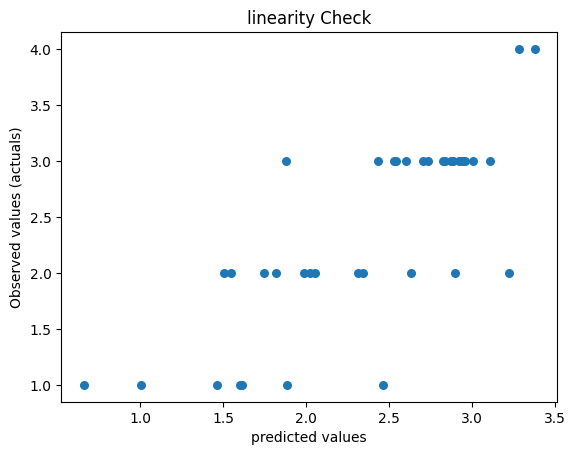

In [26]:
predicted_values = model.predict(X)

plt.scatter(predicted_values, y, s=30)
plt.xlabel("predicted values")
plt.ylabel('Observed values (actuals)')
plt.title("linearity Check")
plt.show()

# don't satisfy

# Check for Independence

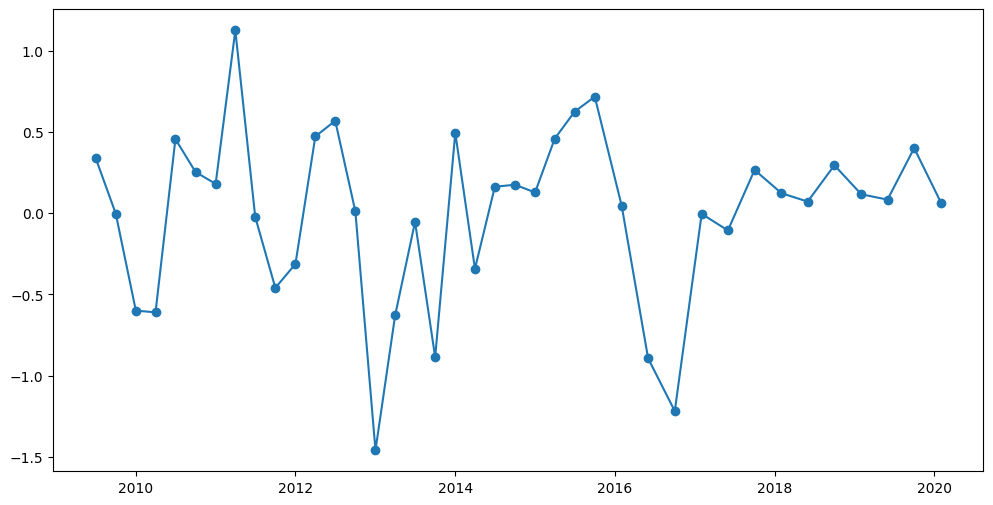

In [27]:
residuals = model.resid

plt.figure(figsize=(12,6))
plt.plot(df['Date'], residuals, marker='o', linestyle='-')
plt.show()

# Check for Homoscedasticity

In [28]:
from statsmodels.stats.diagnostic import het_breuschpagan

_, p,_,_ = het_breuschpagan(residuals, X)
print(p)

if p < 0.05:
    print('Heteroscedasticity detected')
else:
    print('Homoscedasticity is likely')

0.9178271133720634
Homoscedasticity is likely


# Normality of Residuals 

In [29]:
from scipy.stats import shapiro

_, p = shapiro(residuals)

print(p)

if p < 0.05:
    print('residuals are not normally distributed')
else:
    print('residuals are likely normally distributed')

0.04421478137373924
residuals are not normally distributed


# Plot actuals vs predicted

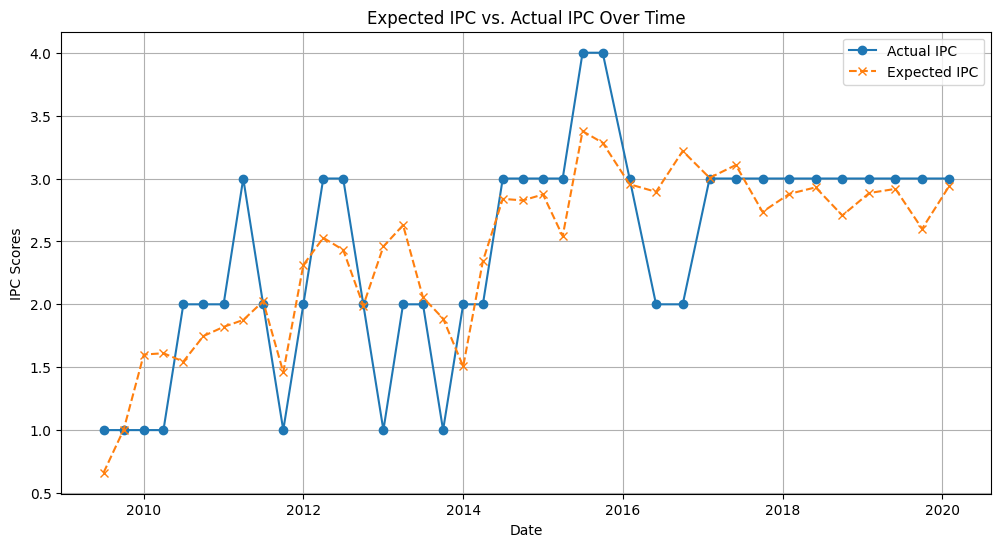

In [30]:
import matplotlib.pyplot as plt

# Predict the IPC values based on the model
y_pred = model.predict(X)

# Create a time series plot to compare expected vs. actual IPC scores
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], y, label='Actual IPC', linestyle='-', marker='o')
plt.plot(df['Date'], y_pred, label='Expected IPC', linestyle='--', marker='x')

# Add labels, a legend, and a title
plt.xlabel('Date')
plt.ylabel('IPC Scores')
plt.title('Expected IPC vs. Actual IPC Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()